<a href="https://colab.research.google.com/github/kchavarro-C/4100901-Intro_Project/blob/main/1_Probabildades_Bayes/1_TAM_ConceptosBasicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicios Capítulo 1 - Teoría de Aprendizaje de Máquina

Elaborado por: Andrés Marino Álvarez Meza, amalvarezme@unal.edu.co

#Ejercicio regresores

 - Genere datos sintéticos a partir de un tono. senoidal, contaminado con ruido blanco Gaussiano para $SNR_{dB}=\{1,2,5,10\} [dB].$

 - Entrene y pruebe los modelos de regresión por mínimos cuadrados (regularizado con norma L2), log verosimilitud y Máximo a posteriori (prior y ruido Gaussianos), utilizando el $80\%$ de los datos para entrenar y el $20\%$ para evaluar.

## Relación señal ruido - Signal to Noise Ratio (SNR)


$P_x = \frac{1}{T}\int |x(t)|^2 dt$ : potencia de la señal.

$P_\eta = \frac{1}{T}\int |\eta(t)|^2 dt$ : potencia del ruido.

La SNR se define como:

$SNR = \frac{P_x}{P_\eta}$

En decibeles:

$SNR_{dB}  = 10\log_{10}\left(\frac{P_x}{P_\eta}\right) \quad [dB]$

Para pasar de $SNR_{dB}$ a SNR:

$SNR = 10^{\frac{SNR_{dB}}{10}} =  \frac{P_x}{P_\eta}$


Para el caso de ruido blanco Guassiano:

$
\eta \sim p(\eta) = \mathscr{G}(\eta|0,\sigma_\eta^2)
$

Dado que $\mu_\eta = 0$:

$\sigma_\eta^2 = \mathbb{E}\{(\eta-\mu_\eta)^2\} = \mathbb{E}\{\eta^2\} $

Utilizando estimador de media muestral:

$\sigma_{\eta}^{2}=\frac{1}{N}\sum_\limits{\eta} \eta^2$

Entonces:

$\sigma_{\eta}^{2} = P_\eta = \frac{P_x}{SNR} =  \frac{P_x}{ 10^{\frac{SNR_{dB}}{10}}}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#función cálculo varianza del ruido a partir del snr dB
def var_snr(x,snrdB): #x vector de datos (señal), snrdB SNR en dB
    Px = np.mean(x**2)#estimador potencia media de la señal
    return Px/(10**(snrdB/10))

Se construyen los datos a partir del modelo:

$t_n = A\sin(2\pi F_o x_n) + \eta_n$

con:

$x_n \in [0,T_o]$

$T_o=1/F_o$

$\eta \sim \mathscr{G}(\eta_n|0,\sigma^2_\eta)$

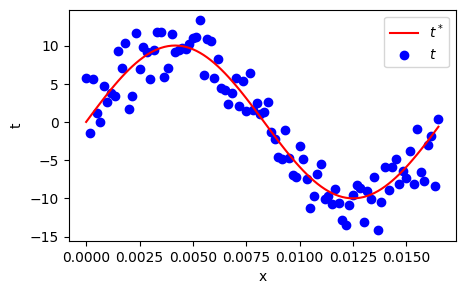

In [2]:
#datos simulados
Fo = 60 #frecuencia fundamental señal cos
A = 10 # amplitud de la señal
To = 1/Fo #periodo fundamental
Fs = 100*Fo #frecuencia muestreo según nyquist Fs >= 2 Fo
X = np.arange(0,To,1/Fs) #vector de entrada en un periodo con pasos según período de muestreo

snrdB = 10 #ruido según SNR dB
#señal limpia - objetivo
tt = A*np.sin(2*np.pi*Fo*X)
#modelo con función sinoidal contaminada con ruido Gaussiano
t = A*np.sin(2*np.pi*Fo*X) + np.sqrt(var_snr(tt,snrdB))*np.random.randn(len(X))

X = X.reshape(-1,1)#filas = realizaciones-muestras
t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()


## Solución por mínimos cuadrados:

Se asume mapeo $\phi:\mathbb{R}^P\to\mathbb{R}^Q$, con $Q\geq P.$

Dado el conjunto de datos $\{\phi(\mathbf{x}_n) \in \mathbb{R}^Q, t_n \in \mathbb{R}\}_{n=1}^N,$ podemos definir el modelo lineal:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\mathbf{w}\in\mathbb{R}^Q$

## Estimador por mínimos cuadrados:

El estimador generalizado de mínimos cuadrados con regularización L2 (también conocido como modelo lineal rígido - linear ridge regression), se puede plantear como:

$$\mathbf{w}_{MC2} = \arg\min_{\mathbf{w}} \|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 + \lambda \|\mathbf{w}\|^2_2$$

con:

$\mathbf{t} = [t_1,t_2,\cdots,t_n]^\top\in\mathbb{R}^N$

$\pmb{\Phi}=[\phi(\mathbf{x}_1),\phi(\mathbf{x}_2),\cdots,\phi(\mathbf{x}_N)]^\top\in\mathbb{R}^{N\times Q}$

$\lambda\in\mathbb{R}^{+}$

Derivando e igualando a cero para encotrar el mínimo de la función de costo, tenemos que:

$$\mathbf{w}_{mc} = \left(\pmb{\Phi}^\top \pmb{\Phi}+\lambda\mathbf{I_Q}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$

$\mathbf{I}_Q$: matriz identidad de tamaño $Q$.



0


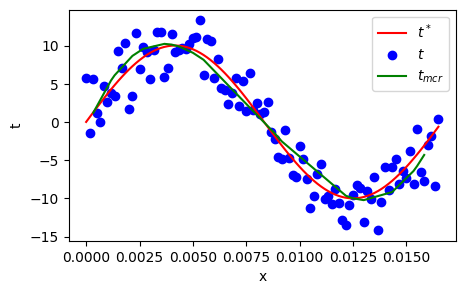

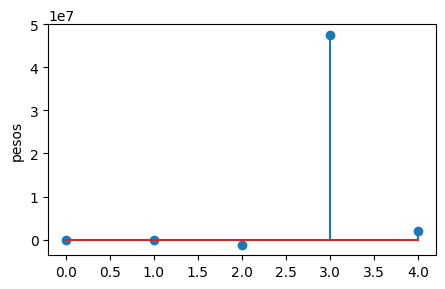

In [3]:
#solución min cuadrados regularizados
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit


#generación representación polinomial
#desde la libreria sklearn
Q = 4#grado del polinomio
phiQ = PolynomialFeatures(degree=Q)
Phi = phiQ.fit_transform(X)#representar datos desde polinomio

#particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)


#regresor
lambdaR = 1e-15#hiperparámetro de regularización
reg_mc = Ridge(alpha=lambdaR)

train_i = np.sort(train_i)
test_i = np.sort(test_i)

reg_mc.fit(Phi[train_i],t[train_i])

t_mc = reg_mc.predict(Phi[test_i])

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.plot(X[test_i],t_mc,c='g',label='$t_{mcr}$')

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5,3))
plt.stem(reg_mc.coef_)
plt.ylabel('pesos')
plt.show()

## Implementando solución por svd

In [4]:
def regsvd(Phi,t,lambdaR=0,tol=1e-16):
  S = Phi.T.dot(Phi) + lambdaR*np.eye(Phi.shape[1])
  val,vec = np.linalg.eigh(S)
  print(val.shape,vec.shape)
  ind = val > tol #valores propios mayores a 0
  Sinv = vec[:,ind].dot(np.diag(1/val[ind])).dot(vec[:,ind].T)
  return Sinv.dot(Phi.T.dot(t)),val


(5,) (5, 5)


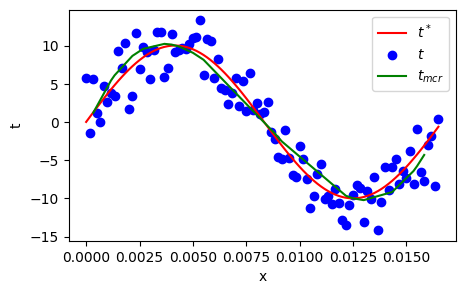

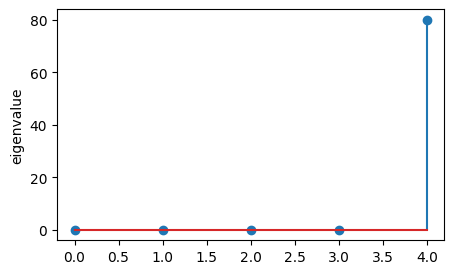

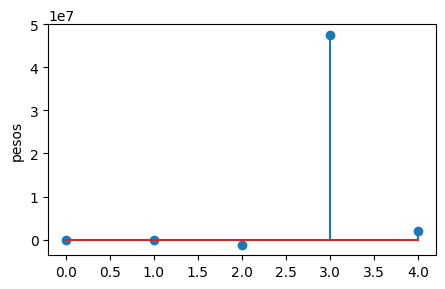

In [5]:
wml,val = regsvd(Phi[train_i],t[train_i],lambdaR=lambdaR)

t_mc = Phi[test_i].dot(wml)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.plot(X[test_i],t_mc,c='g',label='$t_{mcr}$')

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5,3))
plt.stem(val)
plt.ylabel('eigenvalue')
plt.show()

plt.figure(figsize=(5,3))
plt.stem(wml)
plt.ylabel('pesos')
plt.show()

# Predictiva desde máxima verosimilitud

Para el caso de ruido blanco Gaussiano, tenemos que:

$\eta_n \sim p(\eta_n) = \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

con:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)$

Podemos encontrar los pesos y la varianza maximizando el log-verosimilitud:

$$\mathbf{w}_{ML} = \arg\max_{\mathbf{w},\sigma_\eta^2} \log\left(\prod_{n=1}^N\mathscr{G}(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2)\right)$$

Asumiendo datos i.i.d.:

$$\mathbf{w}_{ML},\sigma_{ML}^2 = \arg\max_{\mathbf{w},\sigma_\eta^2} -\frac{N}{2}\log(2\pi)-\frac{N}{2}\log(\sigma_\eta^2)-\frac{1}{2\sigma^2}\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2$$

Derivando respecto a las variables de interés, e igualando a 0:

$$\sigma^2_{ML} = \frac{1}{N}\sum_\limits{n=1}^N\left(t_n-\phi(\mathbf{x}_n)\mathbf{w}^\top\right)^2$$

$$\mathbf{w}_{ML} = \left(\pmb{\Phi}^\top \pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top \mathbf{t}$$


La fdp predictiva, para un nuevo dato $\mathbf{x}_*$, se puede estimar como:

$$p(t_*|\mathbf{x}_*,\mathbf{t},\pmb{\Phi},\mathbf{w}_{ML},\sigma^2_{ML})=\mathscr{G}(t_*|\phi(\mathbf{x}_*)\mathbf{w}_{ML}^\top,\sigma_{ML}^2)$$

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-950701199.py:6: SyntaxWarning: invalid escape sequence '\e'
  plt.scatter(X,t,c='b',label='$t+\eta$')


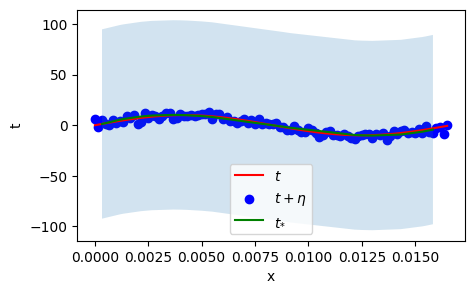

8778.13165018825


In [6]:
#gráfica estimación con predictiva en ML:
var_ml = (np.linalg.norm(t[train_i]-reg_mc.predict(Phi[train_i]))**2)/len(t[train_i])

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t$')
plt.scatter(X,t,c='b',label='$t+\eta$')
plt.plot(X[test_i],t_mc,c='g',label='$t_{*}$')
plt.fill_between(X[test_i].ravel(), t_mc.ravel() - np.sqrt(var_ml)*np.ones(len(t_mc)),
                t_mc.ravel() + np.sqrt(var_ml)*np.ones(len(t_mc)), alpha=0.2)

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

print(var_ml)



## Teorema del límite central

Sea $x_n \sim p(x_n)$ una variable aleatoria con fdp $p(x_n)$.

La combinación:

$a_0 x_0+a_1x_1+a_2x_2+ \cdots a_N x_N \sim \mathscr{G}(\sum_n a_n x_n | \mu_,\sigma^2)$

Siendo $
\mathscr{G}$ una fdp Gaussiana.
## Ejemplo

Sea $x\sim \mathscr{U}(x|0,1)$ una variable aleatoria con fdp Uniforme. Mediante una simulación de Monte-Carlo de 1000 repeticiones, encuentre la estimación por histograma de la fdp de la media muestral $x$, con base al muestreo desde la fdp Uniforme con $N\in\{1.2.10\}$ datos.

<>:19: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:19: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1730987335.py:19: SyntaxWarning: invalid escape sequence '\h'
  plt.xlabel('$\hat{\mu}(x)$')
/tmp/ipython-input-1730987335.py:20: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('$\hat{p}(\hat{\mu}(x))$')


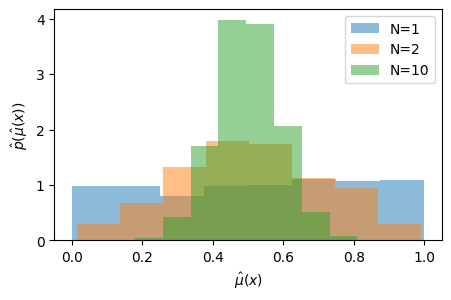

In [7]:
#simulación del teorema del límite central
import numpy as np
import matplotlib.pyplot as plt

#posibles cantidades de datos
N = np.array([1,2,10])
#repeticiones del experimento - simulación de monte carlo
M = 1000
mlc = np.zeros((M,len(N)))

plt.figure(figsize=(5,3))
for i in range(len(N)):#recorrer cantidad de muestras
    for j in range(M): #recorrer iteraciones de monte carlo
        xdata = np.random.rand(N[i])#simulamos datos desde una fdp uniforme
        mlc[j,i] = xdata.mean() #estimación media muestral x
    plt.hist(mlc[:,i],bins=8, label='N='+str(N[i]),density=True, alpha=0.5) #graficar histograma

plt.legend()
plt.xlabel('$\hat{\mu}(x)$')
plt.ylabel('$\hat{p}(\hat{\mu}(x))$')
plt.show()

# Guassianas condicionales y máximo a posteriori

Para resolver el regresor Bayesiano completo, necesitamos encontrar la probabilidad condicional dado una probabilidad conjunta Gaussiana.

Para el caso del máximo a posteriori, desde el teorema de Bayes, tenemos que (se simplifica el modelo en función de la salida y los pesos para facilitar la notación):

$p(\mathbf{t},\mathbf{w})=p(\mathbf{w},\mathbf{t})$

$p(\mathbf{t}|\mathbf{w})p(\mathbf{w})=p(\mathbf{w}|\mathbf{t})p(\mathbf{t})$

El posterior $p(\mathbf{w}|\mathbf{t})$ se puede encontrar como:

$$p(\mathbf{w}|\mathbf{t})=\frac{p(\mathbf{t}|\mathbf{w})p(\mathbf{w})}{p(\mathbf{t})}$$

con evidencia:


$p(\mathbf{t})=\int p(\mathbf{t}|\mathbf{w})p(\mathbf{w}) d\mathbf{w}$

Para el caso de ruido y pesos modelados mediante fdp Gaussinas:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)$

Además:

$p(\mathbf{w})= \mathscr{G}(\mathbf{w}|0,\sigma_w^2\mathbf{I}_Q)$

El modelo por máximo a-posteriori, simplifica la relación de Bayes mediante la proporcionalidad:

$p(\mathbf{w}|\mathbf{t}) \propto p(\mathbf{t}|\mathbf{w})p(\mathbf{w})$

Por consiguiente, asumiendo datos i.i.d.:

$$\mathbf{w}_{MAP} = \arg\max_{\mathbf{w}} \log\left(\prod_{n=1}^N\mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)\prod_{q=1}^Q \mathscr{G}({w}_q|0,\sigma_w^2)\right)$$

Asumiendo datos i.i.d.:

$$\mathbf{w}_{MAP} = \arg\max_{\mathbf{w}} -\frac{1}{2\sigma_\eta^2}\|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 - \frac{1}{2\sigma_w^2}\|\mathbf{w}\|^2_2$$

Teniendo en cuenta que los factores de escala no modifican el punto mínimo/máximo en la optmización, podemos factorizar el problema equivalente MAP como:


$$\mathbf{w}_{MAP} = \arg\min_{\mathbf{w}} \|\mathbf{t}-\pmb{\Phi}\mathbf{w}^\top\|^2_2 + \frac{\sigma^2_\eta}{\sigma_w^2}\|\mathbf{w}\|^2_2$$

Bajo estas suposiciones, el problema de optimización de MAP asumiendo ruido y prior Gaussianos, es equivalente a la optimización de mínimos cuadrados regularizados con $\lambda=\frac{\sigma^2_\eta}{\sigma_w^2}.$

Ahora, analizando un modelo lineal Gaussiano desde la conjunta:


$\mathbf{z} = [\mathbf{x}_a,\mathbf{x}_b] \sim \mathscr{G}(\mathbf{z}|\pmb{\mu},\mathbf{\Sigma})$

tenemos que:

$p(\mathbf{x}_a|\mathbf{x}_b)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a|b},\mathbf{\Sigma}_{a|b})$


donde:

$\pmb{\mu}_{a|b}=\pmb{\mu}_{a}+\mathbf{\Sigma}_{ab}\mathbf{\Sigma}_{bb}^{-1}(\mathbf{x}_b - \pmb{\mu}_b)$

$\mathbf{\Sigma}_{a|b} = \mathbf{\Sigma}_{aa}-\mathbf{\Sigma}_{ab}\mathbf{\Sigma}_{bb}^{-1}\mathbf{\Sigma}_{ba}$

y

$p(\mathbf{x}_a)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a},\mathbf{\Sigma}_{aa})$




## Ejemplo:

Sea la variable aleatoria $\mathbf{z} = [x_a,x_b]\sim \mathscr{G}(\mathbf{z}|\pmb{\mu},\mathbf{\Sigma})$, con:

$$\pmb{\mu} = [\mu_a,\mu_b] = [0.5,0.2]$$

$$\pmb{\Sigma}= \begin{bmatrix} \sigma_a^2 & \sigma_{ab}\\ \sigma_{ba} & \sigma^2_{b}\end{bmatrix} = \begin{bmatrix} 0.8 & 0.3\\ 0.3 & 0.6\end{bmatrix} $$


Encuentre y grafique $p(\mathbf{x}_a)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a},\mathbf{\Sigma}_{aa})$ y $p(\mathbf{x}_a|\mathbf{x}_b)=\mathscr{G}(\mathbf{x}_a|\pmb{\mu}_{a|b},\mathbf{\Sigma}_{a|b})$

/tmp/ipython-input-1128833617.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


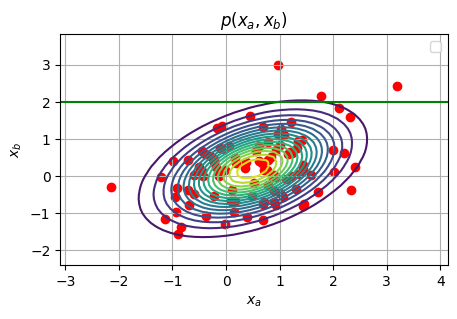

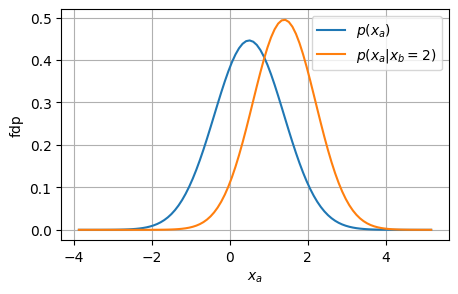

In [8]:
from scipy.stats import multivariate_normal as mn
#simulamos la fdp conjunta
N = 100
muC = np.array([0.5,0.2])
SigmaC = np.array([[0.8,0.3],[0.3,0.6]])
pdfC = mn(muC, SigmaC)
Xd = pdfC.rvs(size=N)
pC = pdfC.pdf(Xd)

#meshgrid contornos
h = 0.02
x_min, x_max = Xd[:, 0].min() - np.std(Xd[:, 0]), Xd[:, 0].max() + np.std(Xd[:, 0])
y_min, y_max = Xd[:, 1].min() - np.std(Xd[:, 1]), Xd[:, 1].max() + np.std(Xd[:, 1])
xx, yy = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)

X = np.linspace(x_min, x_max, round(0.5*N))
Y = np.linspace(y_min, y_max, round(0.5*N))
X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# evaluar pdf conjunta
Z = pdfC.pdf(pos)

#x_b = 2
xb = 2
#contornos
plt.figure(figsize=(5,3))
plt.contour(X, Y, Z,levels=20)
#scatter
plt.scatter(Xd[:,0],Xd[:,1],c='r')
plt.plot(np.linspace(x_min,x_max,50),xb*np.ones((50,1)),c='g')
plt.grid()
plt.xlabel('$x_a$')
plt.ylabel('$x_b$')
plt.title('$p(x_a,x_b)$')
plt.legend()
plt.show()


#probabilidad marginal de x_a
mu_a = 0.5
Sigma_a = 0.8
pdf_a = mn(mu_a, Sigma_a)
X_a = np.linspace(1.25*x_min,1.25*x_max,N)
p_a = pdf_a.pdf(X_a)

#probabilidad condicional x_a | x_b = 2
mu_b = 0.2
Sigma_ab = 0.3
Sigma_ba = Sigma_ab
Sigma_b = 0.6

mu_alb = mu_a+Sigma_ab*Sigma_b**(-1)*(xb - mu_b)
Sigma_alb = Sigma_a-Sigma_ab*Sigma_b**(-1)*Sigma_ba
pdf_alb = mn(mu_alb, Sigma_alb)
p_alb = pdf_alb.pdf(X_a)


plt.figure(figsize=(5,3))
plt.plot(X_a,p_a,label='$p(x_a)$')
plt.plot(X_a,p_alb,label='$p(x_a|x_b=2)$')
plt.xlabel('$x_a$')
plt.ylabel('fdp')
plt.grid()
plt.legend()
plt.show()

## Modelo lineal Gaussiano

Sea el prior:

$p(\mathbf{x})=\mathscr{G}(\mathbf{x}|\pmb{\mu},\pmb{\Lambda}^{-1})$

Además, sea la verosimilitud desde un modelo lineal $\mathbf{y} = \mathbf{A}\mathbf{x}+\mathbf{b}$:

$p(\mathbf{y}|\mathbf{x})=\mathscr{G}(\mathbf{y}|\mathbf{A}\mathbf{x}+\mathbf{b},\mathbf{L}^{-1})$

Completando cuadrados sobre la Gaussiana conjunta, tenemos que:

$p(\mathbf{y})=\mathscr{G}(\mathbf{y}|\mathbf{A}\pmb{\mu}+\mathbf{b},\mathbf{L}^{-1}+\mathbf{A}\pmb{\Lambda}^{-1}\mathbf{A}^\top)$

$p(\mathbf{x}|\mathbf{y})=\mathscr{G}(\mathbf{y}|\pmb{\mu}_{x|y},\mathbf{\Sigma}_{x|y})$

con:

$\pmb{\mu}_{x|y} = \mathbf{\Sigma}_{x|y}\left(\mathbf{A}^\top\mathbf{L}(\mathbf{y}-\mathbf{b})+\pmb{\Lambda}\pmb{\mu}\right)$

$\mathbf{\Sigma}_{x|y} = \left(\pmb{\Lambda}+\mathbf{A}^\top\mathbf{L}\mathbf{A}\right)^{-1}$

Para el caso del modelo de regresión:

$t_n = \phi(\mathbf{x}_n)\mathbf{w}^\top + \eta_n$

$\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$

$\eta_n = t_n - \phi(\mathbf{x}_n)\mathbf{w}^\top$

Por lo tanto, la verosimilitud se puede escribir como:

$p(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(t_n|\phi(\mathbf{x}_n)\mathbf{w}^\top,\sigma_\eta^2\right)$

En forma vectorial:

$p(\mathbf{t}|\pmb{\Phi}\mathbf{w}^\top,\sigma_\eta^2) = \mathscr{G}\left(\mathbf{t}|\pmb{\Phi}\mathbf{w}^\top,\sigma_\eta^2\right)$

Asumiendo el prior:

$p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|\mathbf{m}_o,\mathbf{S}_o)$

El posterior se puede estimar como:

$p(\mathbf{w}|\mathbf{t}) = \mathscr{G}(\mathbf{w}|\mathbf{m}_N,\mathbf{S}_N)$

donde:

$\mathbf{m}_N = \mathbf{S}_N\left(\mathbf{S}_o^{-1}\mathbf{m}_o + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\mathbf{t}\right)$

$\mathbf{S}_N = \left(\mathbf{S}_o^{-1} + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}$

Si se impone un prior de la forma:

$p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|0,\sigma_w^2)$

Entonces:

$p(\mathbf{w}|\mathbf{t}) = \mathscr{G}(\mathbf{w}|\tilde{\mathbf{m}}_N,\tilde{\mathbf{S}}_N)$


$\tilde{\mathbf{m}}_N = \frac{1}{\sigma_\eta^2} \tilde{\mathbf{S}}_N\pmb{\Phi}^\top\mathbf{t}$

$\tilde{\mathbf{S}}_N = \left(\frac{1}{\sigma_w^2}\mathbf{I}_Q + \frac{1}{\sigma_\eta^2}\pmb{\Phi}^\top\pmb{\Phi}\right)^{-1} = \left(\frac{1}{\sigma_\eta^2}\right)^{-1}\left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}$

Reemplazando en la media condicional:

$\tilde{\mathbf{m}}_N = \frac{1}{\sigma_\eta^2} \left(\frac{1}{\sigma_\eta^2}\right)^{-1}\left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top\mathbf{t}$


$\tilde{\mathbf{m}}_N = \left(\frac{\sigma_\eta^2}{\sigma_w^2}\mathbf{I}_Q + \pmb{\Phi}^\top\pmb{\Phi}\right)^{-1}\pmb{\Phi}^\top\mathbf{t}$

**Nota:** la solución del modelo lineal Gaussiano para el prior $p(\mathbf{w}) = \mathscr{G}(\mathbf{w}|0,\sigma_w^2)$ y ante ruido blanco Gaussiano $\eta_n \sim p(\eta_n)= \mathscr{G}(\eta_n|0,\sigma_\eta^2)$, es equivalente en la media $\tilde{\mathbf{m}}_N$ a la solución de mínimos cuadrados regularizados.


## Predictiva

Para un nuevo dato $\mathbf{x}_*$, la distribución predictiva referente a la salida $t_*$ se puede calcular como:

$p(t_*|\mathbf{x}_*,\mathbf{t},\mathbf{w}) = \int p(t_*|\mathbf{x}_*,\mathbf{w})p(\mathbf{w}|\mathbf{t})d\mathbf{w}$

$p(t_*|\mathbf{t}) = \int \mathscr{G}\left(t_*|\phi(\mathbf{x}_*)\mathbf{w}^\top,\sigma_\eta^2\right)\mathscr{G}(\mathbf{w}|\tilde{\mathbf{m}}_N,\tilde{\mathbf{S}}_N)d\mathbf{w}$

$p(t_*|\mathbf{x}_*,\mathbf{t},\mathbf{w}) = \mathscr{G}\left(t_*|\phi(\mathbf{x}_*)\tilde{\mathbf{m}}_N^\top,\sigma_\eta^2 + \phi(\mathbf{x}_*)\tilde{\mathbf{S}}_N \phi(\mathbf{x}_*)^\top\right)$



## Ejercicio:

Implementar simulación para el regresor lineal Gaussiano (Bayesiano), para la señal:

Se construyen los datos a partir del modelo:

$t_n = A\sin(2\pi F_o x_n) + \eta_n$

con:

$x_n \in [0,T_o]$

$T_o=1/F_o$

$\eta \sim \mathscr{G}(\eta_n|0,\sigma^2_\eta)$

Imponga prior Gaussiano isotrópico con media cero.





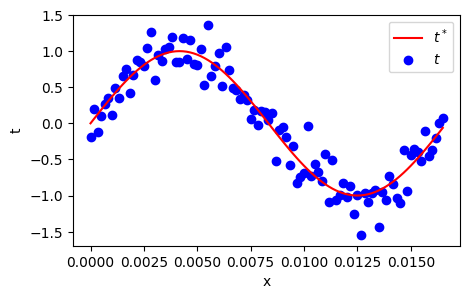

In [9]:
#datos simulados
Fo = 60 #frecuencia fundamental señal cos
A = 1 # amplitud de la señal
To = 1/Fo #periodo fundamental
Fs = 100*Fo #frecuencia muestreo según nyquist Fs >= 2 Fo
X = np.arange(0,To,1/Fs) #vector de entrada en un periodo con pasos según período de muestreo

snrdB = 10 #ruido según SNR dB
#señal limpia - objetivo
tt = A*np.sin(2*np.pi*Fo*X)
#modelo con función sinoidal contaminada con ruido Gaussiano
t = A*np.sin(2*np.pi*Fo*X) + np.sqrt(var_snr(tt,snrdB))*np.random.randn(len(X))

X = X.reshape(-1,1)#filas = realizaciones-muestras
t = t.reshape(-1,1)

plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t^*$')
plt.scatter(X,t,c='b',label='$t$')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [10]:
#Entrenamiento función regresor lineal Gaussiano: posterior
def my_linGuassiano(X,t,phiQ,sig_eta,sig_w,tol=1e-16):
  Phi = phiQ.fit_transform(X)
  lambdaR = sig_eta/sig_w
  SNinv = Phi.T.dot(Phi) + lambdaR*np.eye(Phi.shape[1])#covarianza
  val,vec = np.linalg.eigh(SNinv)
  ind = val > tol #valores propios mayores a 0
  SN = vec[:,ind].dot(np.diag(1/val[ind])).dot(vec[:,ind].T)
  mN = SN.dot(Phi.T.dot(t)) #estimación media lineal Gaussiano
  return mN,SN,val

#estimación predictiva modelo lineal Gaussiano
def my_predictivaLG(xnew,phiQ,mN,SN,sig_eta):
  Phinew = phiQ.fit_transform(xnew) #mapeo polinomio Nnew x Q
  mnew = Phinew.dot(mN)
  signew = np.diag(sig_eta*np.eye(Phinew.shape[0]) + Phinew.dot(SN).dot(Phinew.T))
  return mnew, signew

In [11]:
#generación representación polinomial
#desde la libreria sklearn
Q = 9#grado del polinomio
phiQ = PolynomialFeatures(degree=Q)

#particionar datos
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for i, (train_i, test_i) in enumerate(rs.split(X)):
   print(i)
train_i = np.sort(train_i)
test_i = np.sort(test_i)

#regresor lineal Gaussiano
sig_eta = 1
sig_w = 1e13
mN,SN,val = my_linGuassiano(X[train_i],t[train_i],phiQ,sig_eta,sig_w)
mnew, signew = my_predictivaLG(X[test_i],phiQ,mN,SN,sig_eta)

print(mnew.shape, signew.shape)

0
(20, 1) (20,)


<>:3: SyntaxWarning: invalid escape sequence '\e'
<>:3: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-1422243.py:3: SyntaxWarning: invalid escape sequence '\e'
  plt.scatter(X,t,c='b',label='$t+\eta$')


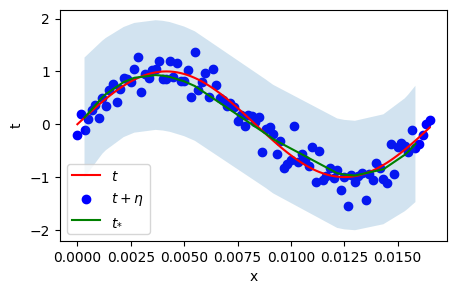

In [12]:
plt.figure(figsize=(5,3))
plt.plot(X,tt,c='r',label='$t$')
plt.scatter(X,t,c='b',label='$t+\eta$')
plt.plot(X[test_i],mnew,c='g',label='$t_{*}$')
plt.fill_between(X[test_i].ravel(), mnew.ravel() - signew,
                        mnew.ravel() + signew, alpha=0.2)

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

# Visualización Regresor Bayesiano en Función de los Datos de Entrenamiento

Se plantea un modelo de regresión lineal con ruido y prior Gaussianos isotrópicos.

In [13]:
#graficar pdf 2D
def my_2Dpdf(mu,Sigma,axes,N=100,h=0.02,xlabel_='$w_0$',ylabel_='$w_1$',
             cmap = 'Reds',xlim=None,ylim=None):
  pdfx = mn(mu, Sigma)
  Xx = pdfx.rvs(size=N)
  pp = pdfx.pdf(Xx)
  #meshgrid contornos
  if xlim == None:
    x_min, x_max = pdfx.mean[0] - 4*pdfx.cov[0,0], pdfx.mean[0] + 4*pdfx.cov[0,0]
  else:
    x_min, x_max = xlim[0], xlim[1]
  if ylim == None:
    y_min, y_max = pdfx.mean[1] - 4*pdfx.cov[1,1], pdfx.mean[1] + 4*pdfx.cov[1,1]
  else:
    y_min, y_max = ylim[0], ylim[1]
  xx, yy = np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)

  X = np.linspace(x_min, x_max, round(0.5*N))
  Y = np.linspace(y_min, y_max, round(0.5*N))
  X, Y = np.meshgrid(X, Y)
  # Pack X and Y into a single 3-dimensional array
  pos = np.empty(X.shape + (2,))
  pos[:, :, 0] = X
  pos[:, :, 1] = Y

  # evaluar pdf conjunta
  Z = pdfx.pdf(pos)
  #contornos
  axes.contourf(X, Y, Z,levels=20,cmap = cmap)
  #axes.grid()
  axes.set_xlabel(xlabel_)
  axes.set_ylabel(ylabel_)
  axes.set_xlim(xlim)
  axes.set_xlim(ylim)

  #plt.title('$p(x_a,x_b)$')
  return

def my_linregsyn(mu,Sigma,axes,xmin=-1,xmax=1,Nmod = 10,xlim=[-1.2,1.2],ylim=[-1.2,1.2]):
  pdfw = mn(mu, Sigma)
  wmod = pdfw.rvs(size=Nmod)
  X = np.random.uniform(low=xmin, high=xmax, size=100)
  t = wmod.dot(np.r_[X.reshape(1,-1),np.ones((1,X.shape[0]))])
  axes.plot(X,t.T,c='b')
  axes.set_xlabel('$x$')
  axes.set_ylabel('$f(x|w)$')
  axes.set_xlim(xlim)
  axes.set_ylim(ylim)
  return

def my_posterior_update(X,t,sig_eta,sig_w,tol=1e-10):
  # X in Real N x P
  # sig_eta varianza ruido Guassiano
  # sig_w varizan prior Gaussiano isotrópico pesos

  lambdaR = sig_eta/sig_w
  SNinv = X.T.dot(X) + lambdaR*np.eye(X.shape[1])#covarianza
  val,vec = np.linalg.eigh(SNinv)
  ind = val > tol #valores propios mayores a 0
  SN = vec[:,ind].dot(np.diag(1/val[ind])).dot(vec[:,ind].T)
  mN = np.squeeze(SN.dot(X.T.dot(t))) #estimación media lineal Gaussiano
  return mN,SN #mN SN mean y cov Gaussiana del posterior


#estimación predictiva modelo lineal Gaussiano
def my_predictiva_update(xnew,mN,SN,sig_eta):
  #Phinew = phiQ.fit_transform(xnew) #mapeo polinomio Nnew x Q
  mnew = xnew.dot(mN)
  signew = np.diag(sig_eta*np.eye(xnew.shape[0]) + xnew.dot(SN).dot(xnew.T))
  return mnew, signew

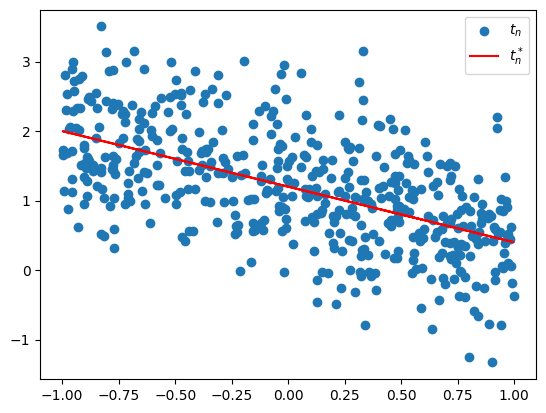

In [14]:
#simular datos regresor lineal + ruido Gaussiano
snrdB = 5 #ruido según SNR dB
#señal limpia - objetivo
N = 500
w_ = np.array([-0.8,1.2]) #pesos modelo original
X = np.c_[np.random.uniform(low=-1, high=1, size=N).reshape(N,1),np.ones((N,1))]
#salida limpia
tt = X.dot(w_.T)
#modelo con función sinoidal contaminada con ruido Gaussiano
sig_eta = var_snr(tt,snrdB)
t = tt + np.sqrt(sig_eta)*np.random.randn(X.shape[0])
plt.scatter(X[:,0],t,label='$t_n$')
plt.plot(X[:,0],tt,'r',label='$t_n^*$')
plt.legend()
plt.show()

0


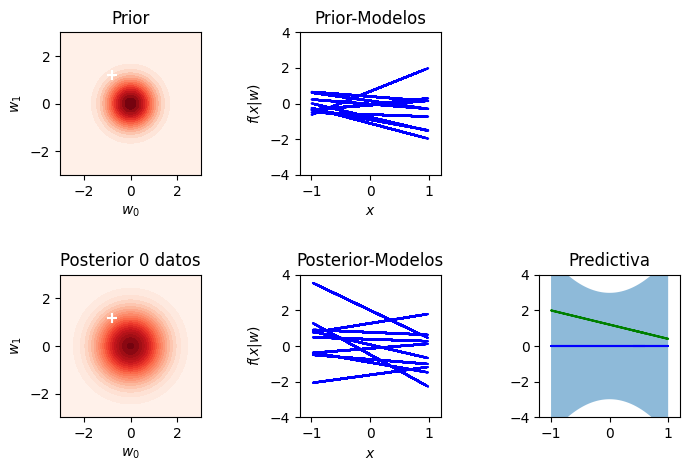

In [15]:
from matplotlib import animation, rc
from IPython.display import HTML

#vector muestreo aleatorio datos en X
ind = np.random.randint(0,X.shape[0],size=X.shape[0])
#definir prior pesos
mu_w = np.array([0,0])
sig_w = 0.5
S_w = sig_w*np.eye(len(mu_w))

#limites gráficos
wxlim = [-3,3]
wylim = [-3,3]
xlim = [-1.2,1.2]
ylim = [-4,4]



#figura y axes animación
fig, ax = plt.subplots(2, 3,figsize=(8,5))
ax[0,2].axis('off')
#función para gráfico interactivo
def update(i):
    #actualización regresor Bayesiano
    #Graficar prior
    ax[0,0].clear()
    ax[0,1].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    ax[1,2].clear()

    my_2Dpdf(mu_w,S_w,axes=ax[0,0],cmap='Reds',xlim=wxlim,ylim=wylim)
    #muestreo regresores desde prior
    my_linregsyn(mu_w,S_w,axes=ax[0,1],xlim=xlim,ylim=ylim)
    #actualizar prior a posterior con 1 dato
    mN,SN = my_posterior_update(X[ind[:i]],t[ind[:i]],sig_eta,sig_w,tol=1e-10)
    my_2Dpdf(mN,SN,axes=ax[1,0],cmap='Reds',xlim=wxlim,ylim=wylim)
    my_linregsyn(mN,SN,axes=ax[1,1],xlim=xlim,ylim=ylim)
    ax[1,1].scatter(X[ind[:i],0],t[ind[:i]],c='r',marker='.')
    #pesos originales
    ax[1,0].scatter(w_[0],w_[1],marker='+',s=60,c='w')
    ax[0,0].scatter(w_[0],w_[1],marker='+',s=60,c='w')

    #graficar predictiva
    mnew,snew = my_predictiva_update(X,mN,SN,sig_eta)
    ax[1,2].plot(X[:,0],tt,c='g')
    ax[1,2].scatter(X[ind[:i],0],t[ind[:i]],c='r',marker='.')
    ax[1,2].plot(X[:,0],mnew,c='b')
    ii = np.argsort(X[:,0]) #organizar eje x para visualizar incertidumbre
    ax[1,2].fill_between(X[ii,0].ravel(), mnew[ii].ravel() - 2*snew[ii],
                        mnew[ii].ravel() + 2*snew[ii], alpha=0.5)
    #Limites para visualizar predictiva
    ax[1,2].set_xlim(xlim)
    ax[1,2].set_ylim(ylim)

    #titulos
    ax[0,0].set_title('Prior')
    ax[0,1].set_title('Prior-Modelos')
    ax[1,0].set_title('Posterior ' + str(i) + ' datos' )
    ax[1,1].set_title('Posterior-Modelos')
    ax[1,2].set_title('Predictiva')
    plt.subplots_adjust(wspace=0.7,hspace=0.7)
    print(i)



#desplegar animación
anim = animation.FuncAnimation(fig, update, frames=np.array([0,1,2,3,5,7,9,10,15,20,25,50,100,250,500]), blit=False)
rc('animation', html='jshtml')


In [16]:
anim

0
0
1
2
3
5
7
9
10
15
20
25
50
100
250
500


<Figure size 640x480 with 0 Axes>

EJERCICIO 25% PARA PARCIAL


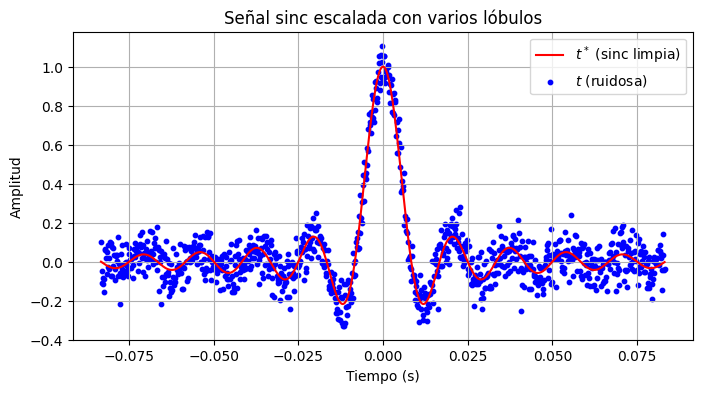

In [73]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Función var_snr
# ---------------------------
def var_snr(signal, snr_dB):
    Ps = np.mean(signal**2)  # potencia de la señal
    snr_linear = 10**(snr_dB/10)
    return Ps / snr_linear

# ---------------------------
# Parámetros
# ---------------------------
Fo = 60   # frecuencia fundamental
A = 1     # amplitud
Fs = 100*Fo  # frecuencia de muestreo

# ampliar el rango temporal: de -5 ciclos a 5 ciclos
t_min = -5/Fo
t_max =  5/Fo
X = np.arange(t_min, t_max, 1/Fs)

snrdB = 10  # SNR en dB

# ---------------------------
# Señal sinc escalada (limpia)
# np.sinc(x) = sin(pi*x)/(pi*x), por eso ajustamos argumento
# Queremos sin(2*pi*Fo*t)/(2*pi*Fo*t)
# que equivale a sinc(2*Fo*t)
# ---------------------------
tt = A * np.sinc(2 * Fo * X)

# ---------------------------
# Señal ruidosa
# ---------------------------
t = tt + np.sqrt(var_snr(tt, snrdB)) * np.random.randn(len(X))

# ---------------------------
# Formato para aprendizaje
# ---------------------------
X = X.reshape(-1, 1)
t = t.reshape(-1, 1)

# ---------------------------
# Gráfica
# ---------------------------
plt.figure(figsize=(8, 4))
plt.plot(X, tt, c='r', label='$t^*$ (sinc limpia)')
plt.scatter(X, t, c='b', s=10, label='$t$ (ruidosa)')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal sinc escalada con varios lóbulos')
plt.grid(True)
plt.show()


In [74]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ShuffleSplit

# ---------------------------
# Funciones
# ---------------------------
def my_linGuassiano(X, t, phiQ, sig_eta, sig_w, tol=1e-16):
    Phi = phiQ.fit_transform(X)
    lambdaR = sig_eta / sig_w
    SNinv = Phi.T.dot(Phi) + lambdaR * np.eye(Phi.shape[1])  # covarianza inversa
    val, vec = np.linalg.eigh(SNinv)
    ind = val > tol
    SN = vec[:, ind].dot(np.diag(1/val[ind])).dot(vec[:, ind].T)
    mN = SN.dot(Phi.T.dot(t))
    return mN, SN, val

def my_predictivaLG(xnew, phiQ, mN, SN, sig_eta):
    Phinew = phiQ.fit_transform(xnew)
    mnew = Phinew.dot(mN)
    signew = np.diag(sig_eta*np.eye(Phinew.shape[0]) + Phinew.dot(SN).dot(Phinew.T))
    return mnew, signew

# ---------------------------
# Transformación polinómica
# ---------------------------
Q = 15  # grado del polinomio (aumentado para capturar la sinc)
phiQ = PolynomialFeatures(degree=Q)

# ---------------------------
# Particionar datos
# ---------------------------
rs = ShuffleSplit(n_splits=1, random_state=0, test_size=0.2)
for i, (train_i, test_i) in enumerate(rs.split(X)):
    print("Split:", i)
train_i = np.sort(train_i)
test_i = np.sort(test_i)

# ---------------------------
# Regresor lineal Gaussiano
# ---------------------------
sig_eta = 1
sig_w = 1e13  # varianza del prior de los pesos
mN, SN, val = my_linGuassiano(X[train_i], t[train_i], phiQ, sig_eta, sig_w)

# ---------------------------
# Predicción sobre datos de test
# ---------------------------
mnew, signew = my_predictivaLG(X[test_i], phiQ, mN, SN, sig_eta)

print("Predicción media shape:", mnew.shape)
print("Varianzas predictivas shape:", signew.shape)


Split: 0
Predicción media shape: (200, 1)
Varianzas predictivas shape: (200,)


<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-477237674.py:7: SyntaxWarning: invalid escape sequence '\e'
  plt.scatter(X, t, c='b', s=10, label='$t + \eta$ (ruido)')
/tmp/ipython-input-477237674.py:17: SyntaxWarning: invalid escape sequence '\p'
  alpha=0.2, color='gray', label='Incertidumbre $\pm \sigma$')


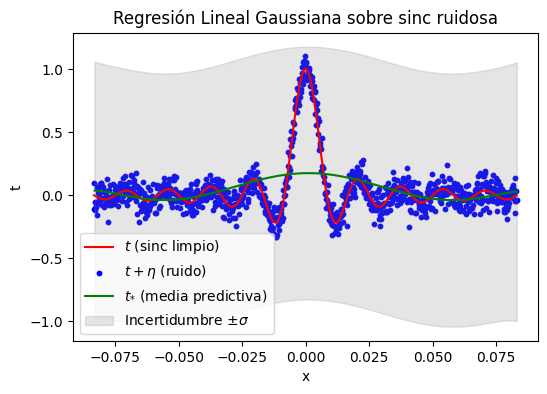

In [75]:
plt.figure(figsize=(6,4))

# señal limpia
plt.plot(X, tt, c='r', label='$t$ (sinc limpio)')

# señal con ruido
plt.scatter(X, t, c='b', s=10, label='$t + \eta$ (ruido)')

# predicción
plt.plot(X[test_i], mnew, c='g', label='$t_{*}$ (media predictiva)')

# bandas de confianza: usar desviación estándar
stdnew = np.sqrt(signew)
plt.fill_between(X[test_i].ravel(),
                 mnew.ravel() - stdnew,
                 mnew.ravel() + stdnew,
                 alpha=0.2, color='gray', label='Incertidumbre $\pm \sigma$')

plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Regresión Lineal Gaussiana sobre sinc ruidosa')
plt.show()


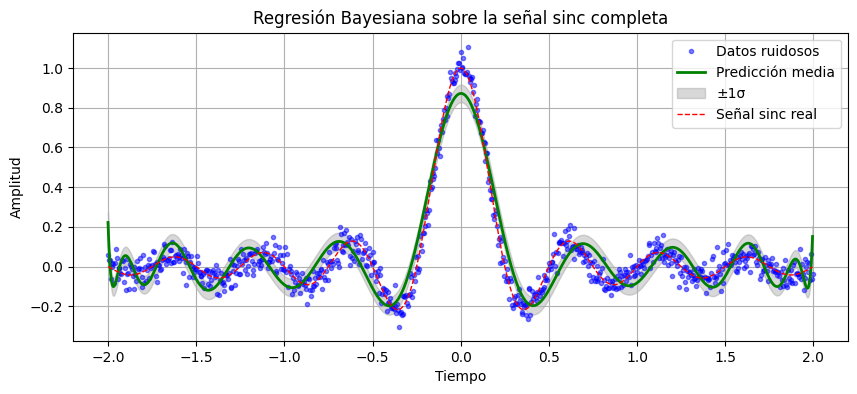

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.preprocessing import PolynomialFeatures

# --- Funciones auxiliares idénticas ---
def _invert_via_eigh(A, tol=1e-12):
    val, vec = np.linalg.eigh(A)
    ind = val > tol
    return vec[:, ind] @ np.diag(1.0/val[ind]) @ vec[:, ind].T

def my_posterior_update(Phi, t, sig_eta, sig_w, tol=1e-12):
    t = np.squeeze(t)
    beta = 1.0 / sig_eta
    alpha = 1.0 / sig_w
    SNinv = alpha * np.eye(Phi.shape[1]) + beta * (Phi.T @ Phi)
    SN = _invert_via_eigh(SNinv, tol)
    mN = beta * SN @ Phi.T @ t
    return mN, SN

def my_predictiva_update(Phinew, mN, SN, sig_eta):
    mnew = Phinew @ mN
    tmp = Phinew @ SN
    varnew = sig_eta + np.sum(tmp * Phinew, axis=1)
    return mnew.reshape(-1,1), varnew

# ---------------------------
# Señal sinc COMPLETA con ruido
# ---------------------------
Fo = 2       # frecuencia fundamental
A = 1
Fs = 200     # frecuencia de muestreo

# ---> Rango simétrico para ver toda la señal
X = np.arange(-2, 2, 1/Fs).reshape(-1,1)

# Señal sinc real (centrada)
tt = A * np.sinc(2 * Fo * X).ravel()

# Ruido
snrdB = 15
Ps = np.mean(tt**2)
sig_eta = Ps / (10**(snrdB/10))
t = tt + np.sqrt(sig_eta)*np.random.randn(len(X))

# ---------------------------
# Transformación polinómica
# ---------------------------
Q = 20
phiQ = PolynomialFeatures(degree=Q)
Phi = phiQ.fit_transform(X)

# Prior
sig_w = 1e4

# Posterior Bayesiano
mN, SN = my_posterior_update(Phi, t, sig_eta, sig_w)

# Predicción en toda la malla
xgrid = np.linspace(X.min(), X.max(), 800).reshape(-1,1)
Phigrid = phiQ.transform(xgrid)
mnew, varnew = my_predictiva_update(Phigrid, mN, SN, sig_eta)

# ---------------------------
# Gráfica de la señal completa
# ---------------------------
plt.figure(figsize=(10,4))
plt.plot(X, t, 'b.', alpha=0.5, label='Datos ruidosos')
plt.plot(xgrid, mnew, 'g', lw=2, label='Predicción media')
plt.fill_between(xgrid.ravel(),
                 mnew.ravel()-np.sqrt(varnew),
                 mnew.ravel()+np.sqrt(varnew),
                 color='gray', alpha=0.3, label='±1σ')
plt.plot(X, tt, 'r--', lw=1, label='Señal sinc real')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Regresión Bayesiana sobre la señal sinc completa')
plt.legend()
plt.grid(True)
plt.show()


Error cuadrático medio (MSE) = 0.0413
Coeficiente de determinación (R²) = 0.2186


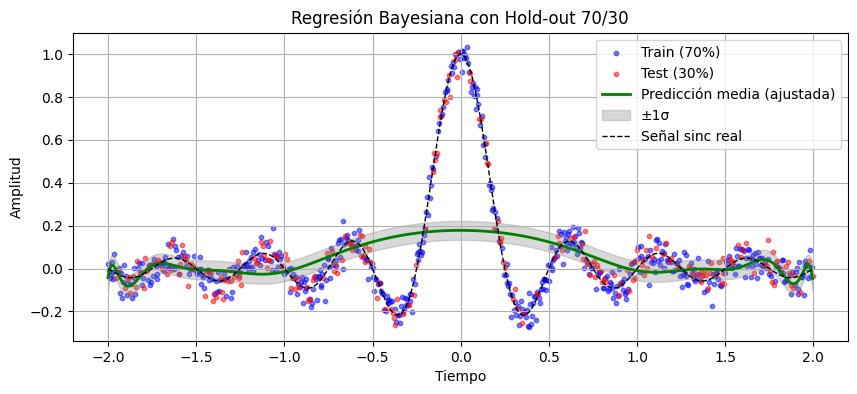

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# --- Funciones auxiliares idénticas ---
def _invert_via_eigh(A, tol=1e-12):
    val, vec = np.linalg.eigh(A)
    ind = val > tol
    return vec[:, ind] @ np.diag(1.0/val[ind]) @ vec[:, ind].T

def my_posterior_update(Phi, t, sig_eta, sig_w, tol=1e-12):
    t = np.squeeze(t)
    beta = 1.0 / sig_eta
    alpha = 1.0 / sig_w
    SNinv = alpha * np.eye(Phi.shape[1]) + beta * (Phi.T @ Phi)
    SN = _invert_via_eigh(SNinv, tol)
    mN = beta * SN @ Phi.T @ t
    return mN, SN

def my_predictiva_update(Phinew, mN, SN, sig_eta):
    mnew = Phinew @ mN
    tmp = Phinew @ SN
    varnew = sig_eta + np.sum(tmp * Phinew, axis=1)
    return mnew.reshape(-1,1), varnew

# ---------------------------
# Señal sinc COMPLETA con ruido
# ---------------------------
Fo = 2       # frecuencia fundamental
A = 1
Fs = 200     # frecuencia de muestreo

X = np.arange(-2, 2, 1/Fs).reshape(-1,1)
tt = A * np.sinc(2 * Fo * X).ravel()

# Ruido
snrdB = 15
Ps = np.mean(tt**2)
sig_eta = Ps / (10**(snrdB/10))
t = tt + np.sqrt(sig_eta)*np.random.randn(len(X))

# ---------------------------
# División Train / Test (70%-30%)
# ---------------------------
np.random.seed(0)
N = len(X)
indices = np.random.permutation(N)
split = int(0.7 * N)

train_idx = indices[:split]
test_idx  = indices[split:]

X_train, t_train = X[train_idx], t[train_idx]
X_test, t_test   = X[test_idx], t[test_idx]

# ---------------------------
# Transformación polinómica
# ---------------------------
Q =25
phiQ = PolynomialFeatures(degree=Q)

Phi_train = phiQ.fit_transform(X_train)
Phi_test  = phiQ.transform(X_test)

# Prior
sig_w = 1e-4

# Posterior Bayesiano con datos de entrenamiento
mN, SN = my_posterior_update(Phi_train, t_train, sig_eta, sig_w)

# Predicción en el conjunto de prueba
m_pred, var_pred = my_predictiva_update(Phi_test, mN, SN, sig_eta)

# ---------------------------
# Evaluación
# ---------------------------
mse = mean_squared_error(t_test, m_pred)
r2  = r2_score(t_test, m_pred)

print(f"Error cuadrático medio (MSE) = {mse:.4f}")
print(f"Coeficiente de determinación (R²) = {r2:.4f}")

# ---------------------------
# Gráfica
# ---------------------------
plt.figure(figsize=(10,4))
plt.scatter(X_train, t_train, c='b', s=10, alpha=0.5, label='Train (70%)')
plt.scatter(X_test, t_test, c='r', s=10, alpha=0.5, label='Test (30%)')

# Curva ajustada en toda la malla
xgrid = np.linspace(X.min(), X.max(), 800).reshape(-1,1)
Phigrid = phiQ.transform(xgrid)
mnew, varnew = my_predictiva_update(Phigrid, mN, SN, sig_eta)

plt.plot(xgrid, mnew, 'g', lw=2, label='Predicción media (ajustada)')
plt.fill_between(xgrid.ravel(),
                 mnew.ravel()-np.sqrt(varnew),
                 mnew.ravel()+np.sqrt(varnew),
                 color='gray', alpha=0.3, label='±1σ')
plt.plot(X, tt, 'k--', lw=1, label='Señal sinc real')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Regresión Bayesiana con Hold-out 70/30')
plt.legend()
plt.grid(True)
plt.show()


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

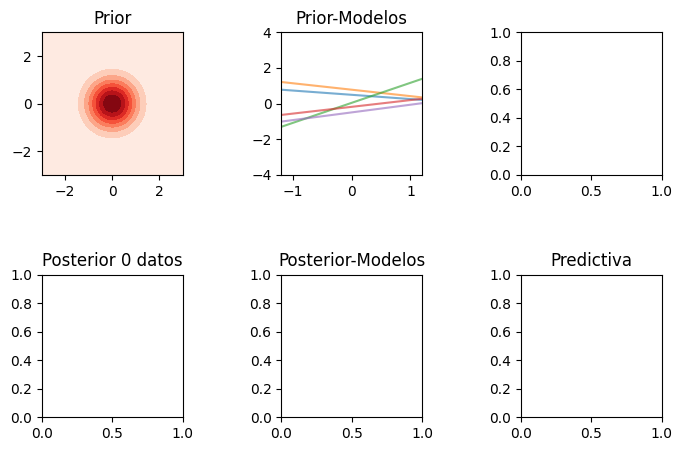

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy.stats import multivariate_normal

# ---------------------------
# Funciones auxiliares
# ---------------------------
def _invert_via_eigh(A, tol=1e-12):
    val, vec = np.linalg.eigh(A)
    ind = val > tol
    return vec[:, ind] @ np.diag(1.0/val[ind]) @ vec[:, ind].T

def my_posterior_update(Phi, t, sig_eta, sig_w, tol=1e-12):
    t = np.squeeze(t)
    beta = 1.0 / sig_eta
    alpha = 1.0 / sig_w
    SNinv = alpha * np.eye(Phi.shape[1]) + beta * (Phi.T @ Phi)
    SN = _invert_via_eigh(SNinv, tol)
    mN = beta * SN @ Phi.T @ t
    return mN, SN

def my_predictiva_update(Phinew, mN, SN, sig_eta):
    mnew = Phinew @ mN
    tmp = Phinew @ SN
    varnew = sig_eta + np.sum(tmp * Phinew, axis=1)
    return mnew.reshape(-1,1), varnew

def my_2Dpdf(mu, Sigma, axes, cmap='Reds', xlim=[-3,3], ylim=[-3,3]):
    x = np.linspace(xlim[0], xlim[1], 100)
    y = np.linspace(ylim[0], ylim[1], 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal(mu, Sigma)
    Z = rv.pdf(pos)
    axes.contourf(X, Y, Z, cmap=cmap)

def my_linregsyn(mu, Sigma, axes, xlim=[-1.2,1.2], ylim=[-4,4], n_samples=5):
    xs = np.linspace(xlim[0], xlim[1], 100).reshape(-1,1)
    Phi = np.c_[np.ones_like(xs), xs]  # regresor lineal
    ws = np.random.multivariate_normal(mu, Sigma, size=n_samples)
    for w in ws:
        ys = Phi @ w
        axes.plot(xs, ys, alpha=0.6)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)

# ---------------------------
# Datos: sinc + ruido
# ---------------------------
Fo = 2
A = 1
Fs = 200
X = np.arange(-2, 2, 1/Fs).reshape(-1,1)
tt = A * np.sinc(2 * Fo * X).ravel()

snrdB = 15
Ps = np.mean(tt**2)
sig_eta = Ps / (10**(snrdB/10))
t = tt + np.sqrt(sig_eta)*np.random.randn(len(X))

# Para animación: orden aleatorio de muestreo
ind = np.random.permutation(len(X))

# ---------------------------
# Prior de pesos (Q=1 → w0, w1)
# ---------------------------
mu_w = np.array([0.0, 0.0])
sig_w = 0.5
S_w = sig_w*np.eye(len(mu_w))

# Limites gráficos
wxlim = [-3,3]
wylim = [-3,3]
xlim = [-1.2,1.2]
ylim = [-4,4]

# ---------------------------
# Animación
# ---------------------------
fig, ax = plt.subplots(2, 3, figsize=(8,5))
ax[0,2].axis('off')

def update(i):
    for a in ax.ravel():
        a.clear()

    # Prior
    my_2Dpdf(mu_w, S_w, axes=ax[0,0], cmap='Reds', xlim=wxlim, ylim=wylim)
    my_linregsyn(mu_w, S_w, axes=ax[0,1], xlim=xlim, ylim=ylim)

    # Construir Phi con bias + X
    Phi = np.c_[np.ones_like(X[ind[:i]]), X[ind[:i]]]

    if i > 0:
        # Posterior con i datos
        mN, SN = my_posterior_update(Phi, t[ind[:i]], sig_eta, sig_w, tol=1e-10)
        my_2Dpdf(mN, SN, axes=ax[1,0], cmap='Reds', xlim=wxlim, ylim=wylim)
        my_linregsyn(mN, SN, axes=ax[1,1], xlim=xlim, ylim=ylim)
        ax[1,1].scatter(X[ind[:i],0], t[ind[:i]], c='r', marker='.')

        # Predictiva
        Phi_full = np.c_[np.ones_like(X), X]
        mnew, snew = my_predictiva_update(Phi_full, mN, SN, sig_eta)
        ax[1,2].plot(X[:,0], tt, c='g', label="Señal real")
        ax[1,2].scatter(X[ind[:i],0], t[ind[:i]], c='r', marker='.')
        ax[1,2].plot(X[:,0], mnew, c='b')
        ii = np.argsort(X[:,0])
        ax[1,2].fill_between(X[ii,0].ravel(),
                             mnew[ii].ravel() - 2*np.sqrt(snew[ii]),
                             mnew[ii].ravel() + 2*np.sqrt(snew[ii]),
                             alpha=0.3)
        ax[1,2].set_xlim(xlim)
        ax[1,2].set_ylim(ylim)

    # Titulos
    ax[0,0].set_title('Prior')
    ax[0,1].set_title('Prior-Modelos')
    ax[1,0].set_title(f'Posterior {i} datos')
    ax[1,1].set_title('Posterior-Modelos')
    ax[1,2].set_title('Predictiva')
    plt.subplots_adjust(wspace=0.7, hspace=0.7)

anim = animation.FuncAnimation(fig, update,
                               frames=[0,1,2,3,5,10,20,50,100,200,300],
                               blit=False)
rc('animation', html='jshtml')
HTML(anim.to_jshtml())


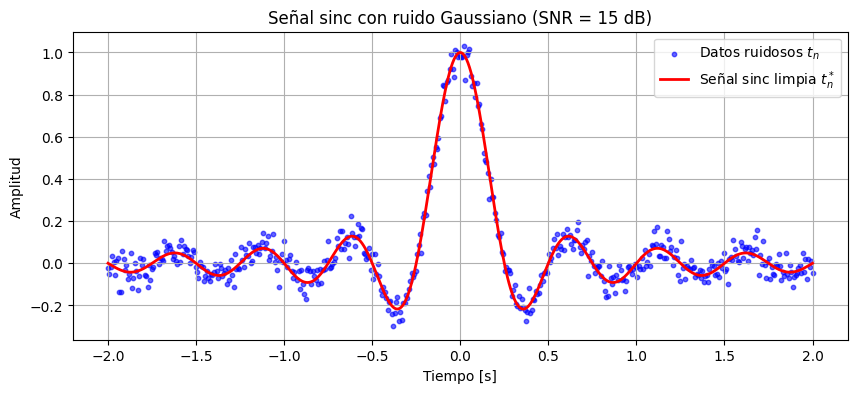

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# Parámetros de la señal
# ---------------------------
Fo = 2      # frecuencia fundamental de la sinc
A  = 1      # amplitud
Fs = 200    # frecuencia de muestreo
N  = 500    # número de muestras
snrdB = 15   # relación señal/ruido en dB

# ---------------------------
# Generar dominio y señal sinc
# ---------------------------
# Rango simétrico para cubrir la señal completa
X = np.linspace(-2, 2, N).reshape(-1,1)

# Señal sinc "limpia" (objetivo)
tt = A * np.sinc(2 * Fo * X.ravel())

# ---------------------------
# Calcular varianza del ruido según SNR
# ---------------------------
def var_snr(signal, snr_db):
    """
    Calcula la varianza del ruido gaussiano para lograr
    una SNR deseada en dB.
    """
    Ps = np.mean(signal**2)                  # potencia de la señal
    return Ps / (10**(snr_db/10))            # varianza del ruido

sig_eta = var_snr(tt, snrdB)

# Añadir ruido Gaussiano
t = tt + np.sqrt(sig_eta) * np.random.randn(N)

# ---------------------------
# Graficar resultados
# ---------------------------
plt.figure(figsize=(10,4))
plt.scatter(X, t, s=10, c='b', alpha=0.6, label='Datos ruidosos $t_n$')
plt.plot(X, tt, 'r', lw=2, label='Señal sinc limpia $t_n^*$')
plt.title(f"Señal sinc con ruido Gaussiano (SNR = {snrdB} dB)")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()


ValueError: Expected 2D array, got 1D array instead:
array=[-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587 -1.95991984
 -1.95190381 -1.94388778 -1.93587174 -1.92785571 -1.91983968 -1.91182365
 -1.90380762 -1.89579158 -1.88777555 -1.87975952 -1.87174349 -1.86372745
 -1.85571142 -1.84769539 -1.83967936 -1.83166333 -1.82364729 -1.81563126
 -1.80761523 -1.7995992  -1.79158317 -1.78356713 -1.7755511  -1.76753507
 -1.75951904 -1.75150301 -1.74348697 -1.73547094 -1.72745491 -1.71943888
 -1.71142285 -1.70340681 -1.69539078 -1.68737475 -1.67935872 -1.67134269
 -1.66332665 -1.65531062 -1.64729459 -1.63927856 -1.63126253 -1.62324649
 -1.61523046 -1.60721443 -1.5991984  -1.59118236 -1.58316633 -1.5751503
 -1.56713427 -1.55911824 -1.5511022  -1.54308617 -1.53507014 -1.52705411
 -1.51903808 -1.51102204 -1.50300601 -1.49498998 -1.48697395 -1.47895792
 -1.47094188 -1.46292585 -1.45490982 -1.44689379 -1.43887776 -1.43086172
 -1.42284569 -1.41482966 -1.40681363 -1.3987976  -1.39078156 -1.38276553
 -1.3747495  -1.36673347 -1.35871743 -1.3507014  -1.34268537 -1.33466934
 -1.32665331 -1.31863727 -1.31062124 -1.30260521 -1.29458918 -1.28657315
 -1.27855711 -1.27054108 -1.26252505 -1.25450902 -1.24649299 -1.23847695
 -1.23046092 -1.22244489 -1.21442886 -1.20641283 -1.19839679 -1.19038076
 -1.18236473 -1.1743487  -1.16633267 -1.15831663 -1.1503006  -1.14228457
 -1.13426854 -1.12625251 -1.11823647 -1.11022044 -1.10220441 -1.09418838
 -1.08617234 -1.07815631 -1.07014028 -1.06212425 -1.05410822 -1.04609218
 -1.03807615 -1.03006012 -1.02204409 -1.01402806 -1.00601202 -0.99799599
 -0.98997996 -0.98196393 -0.9739479  -0.96593186 -0.95791583 -0.9498998
 -0.94188377 -0.93386774 -0.9258517  -0.91783567 -0.90981964 -0.90180361
 -0.89378758 -0.88577154 -0.87775551 -0.86973948 -0.86172345 -0.85370741
 -0.84569138 -0.83767535 -0.82965932 -0.82164329 -0.81362725 -0.80561122
 -0.79759519 -0.78957916 -0.78156313 -0.77354709 -0.76553106 -0.75751503
 -0.749499   -0.74148297 -0.73346693 -0.7254509  -0.71743487 -0.70941884
 -0.70140281 -0.69338677 -0.68537074 -0.67735471 -0.66933868 -0.66132265
 -0.65330661 -0.64529058 -0.63727455 -0.62925852 -0.62124248 -0.61322645
 -0.60521042 -0.59719439 -0.58917836 -0.58116232 -0.57314629 -0.56513026
 -0.55711423 -0.5490982  -0.54108216 -0.53306613 -0.5250501  -0.51703407
 -0.50901804 -0.501002   -0.49298597 -0.48496994 -0.47695391 -0.46893788
 -0.46092184 -0.45290581 -0.44488978 -0.43687375 -0.42885772 -0.42084168
 -0.41282565 -0.40480962 -0.39679359 -0.38877756 -0.38076152 -0.37274549
 -0.36472946 -0.35671343 -0.34869739 -0.34068136 -0.33266533 -0.3246493
 -0.31663327 -0.30861723 -0.3006012  -0.29258517 -0.28456914 -0.27655311
 -0.26853707 -0.26052104 -0.25250501 -0.24448898 -0.23647295 -0.22845691
 -0.22044088 -0.21242485 -0.20440882 -0.19639279 -0.18837675 -0.18036072
 -0.17234469 -0.16432866 -0.15631263 -0.14829659 -0.14028056 -0.13226453
 -0.1242485  -0.11623246 -0.10821643 -0.1002004  -0.09218437 -0.08416834
 -0.0761523  -0.06813627 -0.06012024 -0.05210421 -0.04408818 -0.03607214
 -0.02805611 -0.02004008 -0.01202405 -0.00400802  0.00400802  0.01202405
  0.02004008  0.02805611  0.03607214  0.04408818  0.05210421  0.06012024
  0.06813627  0.0761523   0.08416834  0.09218437  0.1002004   0.10821643
  0.11623246  0.1242485   0.13226453  0.14028056  0.14829659  0.15631263
  0.16432866  0.17234469  0.18036072  0.18837675  0.19639279  0.20440882
  0.21242485  0.22044088  0.22845691  0.23647295  0.24448898  0.25250501
  0.26052104  0.26853707  0.27655311  0.28456914  0.29258517  0.3006012
  0.30861723  0.31663327  0.3246493   0.33266533  0.34068136  0.34869739
  0.35671343  0.36472946  0.37274549  0.38076152  0.38877756  0.39679359
  0.40480962  0.41282565  0.42084168  0.42885772  0.43687375  0.44488978
  0.45290581  0.46092184  0.46893788  0.47695391  0.48496994  0.49298597
  0.501002    0.50901804  0.51703407  0.5250501   0.53306613  0.54108216
  0.5490982   0.55711423  0.56513026  0.57314629  0.58116232  0.58917836
  0.59719439  0.60521042  0.61322645  0.62124248  0.62925852  0.63727455
  0.64529058  0.65330661  0.66132265  0.66933868  0.67735471  0.68537074
  0.69338677  0.70140281  0.70941884  0.71743487  0.7254509   0.73346693
  0.74148297  0.749499    0.75751503  0.76553106  0.77354709  0.78156313
  0.78957916  0.79759519  0.80561122  0.81362725  0.82164329  0.82965932
  0.83767535  0.84569138  0.85370741  0.86172345  0.86973948  0.87775551
  0.88577154  0.89378758  0.90180361  0.90981964  0.91783567  0.9258517
  0.93386774  0.94188377  0.9498998   0.95791583  0.96593186  0.9739479
  0.98196393  0.98997996  0.99799599  1.00601202  1.01402806  1.02204409
  1.03006012  1.03807615  1.04609218  1.05410822  1.06212425  1.07014028
  1.07815631  1.08617234  1.09418838  1.10220441  1.11022044  1.11823647
  1.12625251  1.13426854  1.14228457  1.1503006   1.15831663  1.16633267
  1.1743487   1.18236473  1.19038076  1.19839679  1.20641283  1.21442886
  1.22244489  1.23046092  1.23847695  1.24649299  1.25450902  1.26252505
  1.27054108  1.27855711  1.28657315  1.29458918  1.30260521  1.31062124
  1.31863727  1.32665331  1.33466934  1.34268537  1.3507014   1.35871743
  1.36673347  1.3747495   1.38276553  1.39078156  1.3987976   1.40681363
  1.41482966  1.42284569  1.43086172  1.43887776  1.44689379  1.45490982
  1.46292585  1.47094188  1.47895792  1.48697395  1.49498998  1.50300601
  1.51102204  1.51903808  1.52705411  1.53507014  1.54308617  1.5511022
  1.55911824  1.56713427  1.5751503   1.58316633  1.59118236  1.5991984
  1.60721443  1.61523046  1.62324649  1.63126253  1.63927856  1.64729459
  1.65531062  1.66332665  1.67134269  1.67935872  1.68737475  1.69539078
  1.70340681  1.71142285  1.71943888  1.72745491  1.73547094  1.74348697
  1.75150301  1.75951904  1.76753507  1.7755511   1.78356713  1.79158317
  1.7995992   1.80761523  1.81563126  1.82364729  1.83166333  1.83967936
  1.84769539  1.85571142  1.86372745  1.87174349  1.87975952  1.88777555
  1.89579158  1.90380762  1.91182365  1.91983968  1.92785571  1.93587174
  1.94388778  1.95190381  1.95991984  1.96793587  1.9759519   1.98396794
  1.99198397  2.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Error in callback <function _draw_all_if_interactive at 0x7a6839834d60> (for post_execute):


ValueError: Expected 2D array, got 1D array instead:
array=[-2.         -1.99198397 -1.98396794 -1.9759519  -1.96793587 -1.95991984
 -1.95190381 -1.94388778 -1.93587174 -1.92785571 -1.91983968 -1.91182365
 -1.90380762 -1.89579158 -1.88777555 -1.87975952 -1.87174349 -1.86372745
 -1.85571142 -1.84769539 -1.83967936 -1.83166333 -1.82364729 -1.81563126
 -1.80761523 -1.7995992  -1.79158317 -1.78356713 -1.7755511  -1.76753507
 -1.75951904 -1.75150301 -1.74348697 -1.73547094 -1.72745491 -1.71943888
 -1.71142285 -1.70340681 -1.69539078 -1.68737475 -1.67935872 -1.67134269
 -1.66332665 -1.65531062 -1.64729459 -1.63927856 -1.63126253 -1.62324649
 -1.61523046 -1.60721443 -1.5991984  -1.59118236 -1.58316633 -1.5751503
 -1.56713427 -1.55911824 -1.5511022  -1.54308617 -1.53507014 -1.52705411
 -1.51903808 -1.51102204 -1.50300601 -1.49498998 -1.48697395 -1.47895792
 -1.47094188 -1.46292585 -1.45490982 -1.44689379 -1.43887776 -1.43086172
 -1.42284569 -1.41482966 -1.40681363 -1.3987976  -1.39078156 -1.38276553
 -1.3747495  -1.36673347 -1.35871743 -1.3507014  -1.34268537 -1.33466934
 -1.32665331 -1.31863727 -1.31062124 -1.30260521 -1.29458918 -1.28657315
 -1.27855711 -1.27054108 -1.26252505 -1.25450902 -1.24649299 -1.23847695
 -1.23046092 -1.22244489 -1.21442886 -1.20641283 -1.19839679 -1.19038076
 -1.18236473 -1.1743487  -1.16633267 -1.15831663 -1.1503006  -1.14228457
 -1.13426854 -1.12625251 -1.11823647 -1.11022044 -1.10220441 -1.09418838
 -1.08617234 -1.07815631 -1.07014028 -1.06212425 -1.05410822 -1.04609218
 -1.03807615 -1.03006012 -1.02204409 -1.01402806 -1.00601202 -0.99799599
 -0.98997996 -0.98196393 -0.9739479  -0.96593186 -0.95791583 -0.9498998
 -0.94188377 -0.93386774 -0.9258517  -0.91783567 -0.90981964 -0.90180361
 -0.89378758 -0.88577154 -0.87775551 -0.86973948 -0.86172345 -0.85370741
 -0.84569138 -0.83767535 -0.82965932 -0.82164329 -0.81362725 -0.80561122
 -0.79759519 -0.78957916 -0.78156313 -0.77354709 -0.76553106 -0.75751503
 -0.749499   -0.74148297 -0.73346693 -0.7254509  -0.71743487 -0.70941884
 -0.70140281 -0.69338677 -0.68537074 -0.67735471 -0.66933868 -0.66132265
 -0.65330661 -0.64529058 -0.63727455 -0.62925852 -0.62124248 -0.61322645
 -0.60521042 -0.59719439 -0.58917836 -0.58116232 -0.57314629 -0.56513026
 -0.55711423 -0.5490982  -0.54108216 -0.53306613 -0.5250501  -0.51703407
 -0.50901804 -0.501002   -0.49298597 -0.48496994 -0.47695391 -0.46893788
 -0.46092184 -0.45290581 -0.44488978 -0.43687375 -0.42885772 -0.42084168
 -0.41282565 -0.40480962 -0.39679359 -0.38877756 -0.38076152 -0.37274549
 -0.36472946 -0.35671343 -0.34869739 -0.34068136 -0.33266533 -0.3246493
 -0.31663327 -0.30861723 -0.3006012  -0.29258517 -0.28456914 -0.27655311
 -0.26853707 -0.26052104 -0.25250501 -0.24448898 -0.23647295 -0.22845691
 -0.22044088 -0.21242485 -0.20440882 -0.19639279 -0.18837675 -0.18036072
 -0.17234469 -0.16432866 -0.15631263 -0.14829659 -0.14028056 -0.13226453
 -0.1242485  -0.11623246 -0.10821643 -0.1002004  -0.09218437 -0.08416834
 -0.0761523  -0.06813627 -0.06012024 -0.05210421 -0.04408818 -0.03607214
 -0.02805611 -0.02004008 -0.01202405 -0.00400802  0.00400802  0.01202405
  0.02004008  0.02805611  0.03607214  0.04408818  0.05210421  0.06012024
  0.06813627  0.0761523   0.08416834  0.09218437  0.1002004   0.10821643
  0.11623246  0.1242485   0.13226453  0.14028056  0.14829659  0.15631263
  0.16432866  0.17234469  0.18036072  0.18837675  0.19639279  0.20440882
  0.21242485  0.22044088  0.22845691  0.23647295  0.24448898  0.25250501
  0.26052104  0.26853707  0.27655311  0.28456914  0.29258517  0.3006012
  0.30861723  0.31663327  0.3246493   0.33266533  0.34068136  0.34869739
  0.35671343  0.36472946  0.37274549  0.38076152  0.38877756  0.39679359
  0.40480962  0.41282565  0.42084168  0.42885772  0.43687375  0.44488978
  0.45290581  0.46092184  0.46893788  0.47695391  0.48496994  0.49298597
  0.501002    0.50901804  0.51703407  0.5250501   0.53306613  0.54108216
  0.5490982   0.55711423  0.56513026  0.57314629  0.58116232  0.58917836
  0.59719439  0.60521042  0.61322645  0.62124248  0.62925852  0.63727455
  0.64529058  0.65330661  0.66132265  0.66933868  0.67735471  0.68537074
  0.69338677  0.70140281  0.70941884  0.71743487  0.7254509   0.73346693
  0.74148297  0.749499    0.75751503  0.76553106  0.77354709  0.78156313
  0.78957916  0.79759519  0.80561122  0.81362725  0.82164329  0.82965932
  0.83767535  0.84569138  0.85370741  0.86172345  0.86973948  0.87775551
  0.88577154  0.89378758  0.90180361  0.90981964  0.91783567  0.9258517
  0.93386774  0.94188377  0.9498998   0.95791583  0.96593186  0.9739479
  0.98196393  0.98997996  0.99799599  1.00601202  1.01402806  1.02204409
  1.03006012  1.03807615  1.04609218  1.05410822  1.06212425  1.07014028
  1.07815631  1.08617234  1.09418838  1.10220441  1.11022044  1.11823647
  1.12625251  1.13426854  1.14228457  1.1503006   1.15831663  1.16633267
  1.1743487   1.18236473  1.19038076  1.19839679  1.20641283  1.21442886
  1.22244489  1.23046092  1.23847695  1.24649299  1.25450902  1.26252505
  1.27054108  1.27855711  1.28657315  1.29458918  1.30260521  1.31062124
  1.31863727  1.32665331  1.33466934  1.34268537  1.3507014   1.35871743
  1.36673347  1.3747495   1.38276553  1.39078156  1.3987976   1.40681363
  1.41482966  1.42284569  1.43086172  1.43887776  1.44689379  1.45490982
  1.46292585  1.47094188  1.47895792  1.48697395  1.49498998  1.50300601
  1.51102204  1.51903808  1.52705411  1.53507014  1.54308617  1.5511022
  1.55911824  1.56713427  1.5751503   1.58316633  1.59118236  1.5991984
  1.60721443  1.61523046  1.62324649  1.63126253  1.63927856  1.64729459
  1.65531062  1.66332665  1.67134269  1.67935872  1.68737475  1.69539078
  1.70340681  1.71142285  1.71943888  1.72745491  1.73547094  1.74348697
  1.75150301  1.75951904  1.76753507  1.7755511   1.78356713  1.79158317
  1.7995992   1.80761523  1.81563126  1.82364729  1.83166333  1.83967936
  1.84769539  1.85571142  1.86372745  1.87174349  1.87975952  1.88777555
  1.89579158  1.90380762  1.91182365  1.91983968  1.92785571  1.93587174
  1.94388778  1.95190381  1.95991984  1.96793587  1.9759519   1.98396794
  1.99198397  2.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

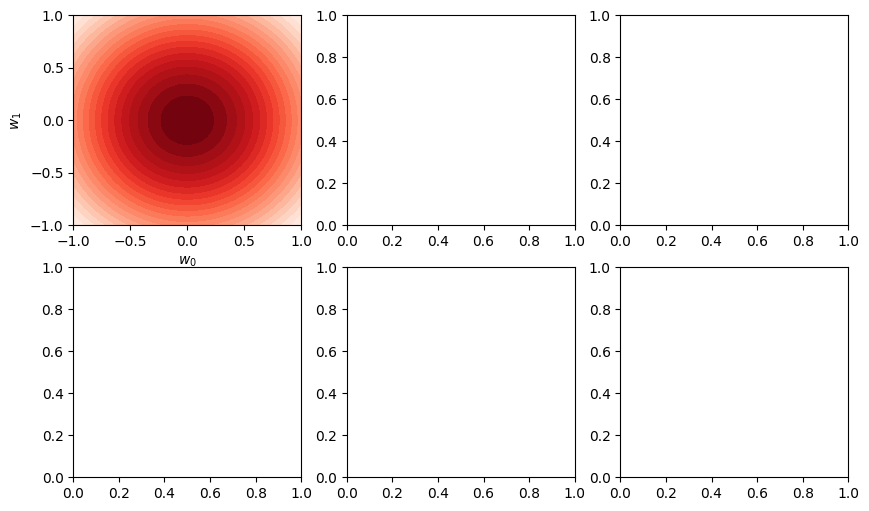

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from sklearn.preprocessing import PolynomialFeatures

# ------------------------------------------------
# 1) Señal sinc ruidosa
# ------------------------------------------------
Fo = 2
A  = 1
N  = 500
snrdB = 5   # SNR en dB

X = np.linspace(-2, 2, N).reshape(-1,1)  # dominio completo
tt = A * np.sinc(2 * Fo * X.ravel())     # señal limpia

def var_snr(signal, snr_db):
    Ps = np.mean(signal**2)
    return Ps / (10**(snr_db/10))

sig_eta = var_snr(tt, snrdB)
t = tt + np.sqrt(sig_eta) * np.random.randn(N)

# ------------------------------------------------
# 2) Transformación polinómica para el modelo
# ------------------------------------------------
Q = 9  # grado del polinomio
phiQ = PolynomialFeatures(degree=Q)
Phi = phiQ.fit_transform(X)

# ------------------------------------------------
# 3) Funciones auxiliares
# ------------------------------------------------
def _invert_via_eigh(A, tol=1e-12):
    val, vec = np.linalg.eigh(A)
    ind = val > tol
    return vec[:, ind] @ np.diag(1.0/val[ind]) @ vec[:, ind].T

def my_posterior_update(Phi, t, sig_eta, sig_w, tol=1e-12):
    t = np.squeeze(t)
    beta = 1.0 / sig_eta
    alpha = 1.0 / sig_w
    SNinv = alpha * np.eye(Phi.shape[1]) + beta * (Phi.T @ Phi)
    SN = _invert_via_eigh(SNinv, tol)
    mN = beta * SN @ (Phi.T @ t)
    return mN, SN

def my_predictiva_update(Phinew, mN, SN, sig_eta):
    mnew = Phinew @ mN
    tmp  = Phinew @ SN
    var  = sig_eta + np.sum(tmp * Phinew, axis=1)
    return mnew, np.sqrt(var)

from scipy.stats import multivariate_normal
def my_2Dpdf(mu, Sigma, axes, cmap='Reds', xlim=None, ylim=None):
    # sólo mostrar las dos primeras dimensiones del espacio de pesos
    mu2 = mu[:2]
    Sigma2 = Sigma[:2,:2]
    rv = multivariate_normal(mu2, Sigma2)
    if xlim is None:
        xlim = [mu2[0]-3*np.sqrt(Sigma2[0,0]), mu2[0]+3*np.sqrt(Sigma2[0,0])]
    if ylim is None:
        ylim = [mu2[1]-3*np.sqrt(Sigma2[1,1]), mu2[1]+3*np.sqrt(Sigma2[1,1])]
    x = np.linspace(*xlim, 100)
    y = np.linspace(*ylim, 100)
    Xg,Yg = np.meshgrid(x,y)
    pos = np.empty(Xg.shape + (2,))
    pos[:,:,0] = Xg; pos[:,:,1] = Yg
    Z = rv.pdf(pos)
    axes.contourf(Xg,Yg,Z,levels=20,cmap=cmap)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    axes.set_xlabel('$w_0$')
    axes.set_ylabel('$w_1$')

def my_linregsyn(mu, Sigma, axes, xgrid, phiQ, Nmod=5):
    wmods = np.random.multivariate_normal(mu, Sigma, size=Nmod)
    Phi_g = phiQ.transform(xgrid)
    for w in wmods:
        y = Phi_g @ w
        axes.plot(xgrid, y, alpha=0.5, c='b')
    axes.set_xlabel('$x$')
    axes.set_ylabel('$f(x)$')

# ------------------------------------------------
# 4) Animación Bayesiana
# ------------------------------------------------
# mu prior (P,): vector de ceros
P = Phi.shape[1]
mu_w = np.zeros(P)
sig_w = 1.0
S_w = sig_w * np.eye(P)

# índices aleatorios de muestreo progresivo
ind = np.random.permutation(N)

# límites de ejes
wxlim = [-1,1]
wylim = [-1,1]
xlim  = [X.min(), X.max()]
ylim  = [tt.min()-1, tt.max()+1]

fig, ax = plt.subplots(2, 3, figsize=(10,6))
ax[0,2].axis('off')

def update(i):
    for a in ax.flat:
        a.cla()
    # prior
    my_2Dpdf(mu_w, S_w, axes=ax[0,0], xlim=wxlim, ylim=wylim)
    my_linregsyn(mu_w, S_w, axes=ax[0,1], xgrid=X.ravel(), phiQ=phiQ)

    # datos usados hasta el paso i
    Xi = X[ind[:i]]
    ti = t[ind[:i]]
    Phii = phiQ.transform(Xi)

    # posterior
    mN, SN = my_posterior_update(Phii, ti, sig_eta, sig_w)
    my_2Dpdf(mN, SN, axes=ax[1,0], xlim=wxlim, ylim=wylim)
    my_linregsyn(mN, SN, axes=ax[1,1], xgrid=X.ravel(), phiQ=phiQ)
    ax[1,1].scatter(Xi, ti, c='r', s=10)

    # predictiva
    mnew, snew = my_predictiva_update(phiQ.transform(X), mN, SN, sig_eta)
    ax[1,2].plot(X, tt, 'g', label='Señal sinc limpia')
    ax[1,2].scatter(Xi, ti, c='r', s=10, label='Datos')
    ax[1,2].plot(X, mnew, 'b', label='Media posterior')
    ax[1,2].fill_between(X.ravel(), mnew - 2*snew, mnew + 2*snew, color='gray', alpha=0.4)
    ax[1,2].set_xlim(xlim)
    ax[1,2].set_ylim(ylim)

    ax[0,0].set_title('Prior de pesos')
    ax[0,1].set_title('Funciones desde Prior')
    ax[1,0].set_title(f'Posterior con {i} datos')
    ax[1,1].set_title('Funciones desde Posterior')
    ax[1,2].set_title('Predicción bayesiana')
    ax[1,2].legend(fontsize=7)
    plt.tight_layout()

# frames elegidos para mostrar el aprendizaje
frames = [0,1,2,5,10,20,50,100,200,400,N]
anim = animation.FuncAnimation(fig, update, frames=frames, interval=600, blit=False)
rc('animation', html='jshtml')
HTML(anim.to_jshtml())


# Ejercicio Bonificación Parcial 1 (Hasta 1 unidad)

- Presente la animación de actualización del modelo ilustrado en el ejemplo anterior para el estimador de máxima verosimilitud (graficar estimación con incertidumbre).

- Repetir el ejemplo de la animación para el estimador Bayesiano para la función senoidal contaminada con ruido Gaussiano utilizando mapeo Polinomial de grado 9.

- Incluya la gráfica de la magnitud de los pesos y la matriz covarianza como una imagen.

- Para las dos componentes más importentes, repita la animación del ejemplo.

- Repita para un mapeo por Gaussianas (RBF) de orden 30.

